# 25: Logistic Regression



![](https://wordstream-files-prod.s3.amazonaws.com/s3fs-public/styles/simple_image/public/images/machine-learning1.png?SnePeroHk5B9yZaLY7peFkULrfW8Gtaf&itok=yjEJbEKD)

## What is Logistic Regression? 

![](https://miro.medium.com/max/400/1*zLfpo6F_Bfi6uvRL6iLX_Q.jpeg)
It belongs to a class of predictive models called _Generalized Linear Models_. All of these models have 2 things in common: They all define significant relationships between independent/dependent variables and they indicate the strength of the relationships. 

Different from Linear regression -- it can predict the probabilities associated with **a success or a failure**. Is this email likely spam? What is the probability that this citizen will vote Republican? Is this homeowner likely to default on their mortgage? Is this person likely to buy our product? Is this tumor likely to be cancerous or benign?

### Assumptions 
**Logistic Regression Assumptions:**

* Binary logistic regression requires the dependent variable to be binary.
* Only the meaningful variables should be included.
* The independent variables should be independent of each other. That is, the model should have little or no multi-collinearity.
* The independent variables are linearly related to the log odds.
* Logistic regression requires quite large sample sizes.

### Key differences from Linear Regression:
* GLM does not assume a linear relationship between dependent and independent variables. However, it assumes a linear relationship between link function and independent variables in logit model.

* The dependent variable need not to be normally distributed.

* It does not uses OLS (Ordinary Least Square) for parameter estimation. Instead, it uses maximum likelihood estimation (MLE).

* Errors need to be independent but not normally distributed.

### Logistic Regression Equation

![](https://miro.medium.com/max/571/0*tGVPGu3aa1rhTdfl.png)
Let's say we've constructed our best-fit line, i.e. our linear predictor, $\hat{L} = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$.

#### The Sigmoid Function

Consider the following transformation:
$\large\hat{y} = \Large\frac{1}{1 + e^{-\hat{L}}} \large= \Large\frac{1}{1 + e^{-(\beta_0 + ... + \beta_nx_n)}}$. This is called the sigmoid function.

This function squeezes our predictions between 0 and 1. 

Suppose I'm building a model to predict whether a plant is poisonous or not, based perhaps on certain biological features of its leaves. 
* I'll let '1' indicate a poisonous plant and '0' indicate a non-poisonous plant.
* Now I'm forcing my predictions to be between 0 and 1, so suppose for test plant $P$ I get some value like 0.19.
* I can naturally understand this as the probability that $P$ is poisonous.
* If I truly want a binary prediction, I can simply round my score appropriately.

How do we fit a line to our dependent variable if its values are already stored as probabilities? We can use the inverse of the sigmoid function, and just set our regression equation equal to that. The inverse of the sigmoid function is called the logit function, and it looks like this:

$$\large f(y) = \ln\left(\frac{y}{1 - y}\right)$$

Notice that the domain of this function is $(0, 1)$.

Quick proof that logit and sigmoid are inverse functions:

$\hspace{170mm}x = \frac{1}{1 + e^{-y}}$;
$\hspace{170mm}$so $1 + e^{-y} = \frac{1}{x}$;
$\hspace{170mm}$so $e^{-y} = \frac{1 - x}{x}$;
$\hspace{170mm}$so $-y = \ln\left(\frac{1 - x}{x}\right)$;
$\hspace{170mm}$so $y = \ln\left(\frac{x}{1 - x}\right)$.)

Our regression equation will now look like this:

$\large\ln\left(\frac{y}{1 - y}\right) = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$.

## Coding Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import some data to play with
from sklearn import datasets

# For our modeling steps
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
iris = datasets.load_iris()

df = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


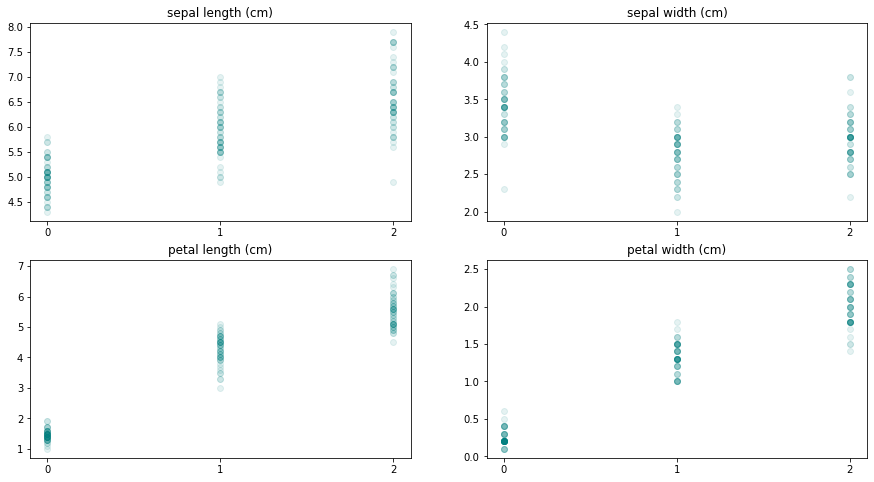

In [3]:
# Creating a large figure
fig = plt.figure(figsize=(15, 8))

# Iterating over the different
for i in range(0, 4):
    # Figure number starts at 1
    ax = fig.add_subplot(2, 2, i+1)
    # Add a title to make it clear what each subplot shows
    plt.title(df.columns[i])
    # Use alpha to better see crossing pints
    ax.scatter(df['target'], df.iloc[:,i], c='teal', alpha=0.1)
    # Only show the tick marks for each target
    plt.xticks(df.target.unique())

In [4]:
X = df.iloc[:,:-1]
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)


In [5]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver='lbfgs', multi_class='auto')
logreg.fit(X_train, y_train)


LogisticRegression(C=1000000000000.0, fit_intercept=False)

In [6]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [7]:
y_hat_test

array([2., 0., 2., 2., 1., 1., 1., 2., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       2., 2., 2., 1., 0., 1., 0., 2., 2., 1., 0., 1., 2.])

In [8]:
residuals = y_train == y_hat_train

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted:
True     117
False      3
Name: target, dtype: int64


In [9]:
residuals = y_test == y_hat_test

print('Number of values correctly predicted: ')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted: 
True     28
False     2
Name: target, dtype: int64


# Evaluating Classification Models 

For classification problems, the target is a categorical variable. This means that we can simply count the number of times that our model predicts the correct category and the number of times that it predicts something else.

We can visualize this by means of a **confusion matrix**, a tabular representation of Actual vs Predicted values.
![](https://miro.medium.com/max/350/0*rhntpf-9O0A5HjCP)

**The metrics for evaluating your models performance can be drawn from this matrix** 

* Accuracy = $\frac{TP + TN}{TP + TN + FP + FN}$

* Recall = $\frac{TP}{TP + FN}$

* Precision = $\frac{TP}{TP + FP}$

* F-1 Score = $\frac{2PrRc}{Pr + Rc}$ = $\frac{2TP}{2TP + FP + FN}$ 

**General Lessons**: 
First, let's make some general observations about the metrics we've so far defined.

**Accuracy:**

   * **Pro:** Takes into account both false positives and false negatives.

   * **Con:** Can be misleadingly high when there is a significant class imbalance. (A lottery-ticket predictor that always predicts a loser will be highly accurate.)

**Recall:**

   * **Pro:** Highly sensitive to false negatives.

   * **Con:** No sensitivity to false positives.

**Precision:**

   * **Pro:** Highly sensitive to false positives.

   * **Con:** No sensitivity to false negatives.


**F-1 Score:**

Harmonic mean of recall and precision.

**AIC (Akaike Information Criteria**) — The analogous metric of adjusted R² in logistic regression is AIC. AIC is the measure of fit which penalizes model for the number of model coefficients. Therefore, we always prefer model with minimum AIC value.

**ROC Curve:** Receiver Operating Characteristic (ROC) summarizes the model’s performance by evaluating the trade-offs between true positive rate (sensitivity) and false positive rate (1- specificity). For plotting ROC, it is advisable to assume p > 0.5 since we are more concerned about success rate. ROC summarizes the predictive power for all possible values of p > 0.5. The area under curve (AUC), referred to as index of accuracy (A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model. Below is a sample ROC curve. The ROC of a perfect predictive model has TP equals 1 and FP equals 0. This curve will touch the top left corner of the graph.
![](https://miro.medium.com/max/300/0*20UWoOC5Gi4SdbAw.jpg)


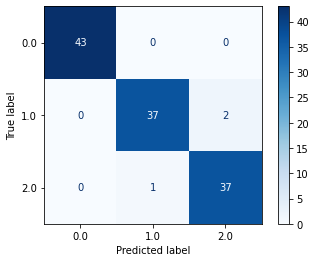

In [10]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logreg, X_train, y_train,
                     cmap=plt.cm.Blues)
plt.show()

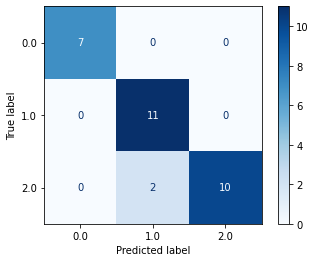

In [11]:
plot_confusion_matrix(logreg, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.show()

In [12]:
from sklearn.preprocessing import label_binarize
y_bin = label_binarize(y, classes=[0, 1, 2])

y_bin_train, y_bin_test = train_test_split(y_bin, test_size=0.2, random_state=27)

In [13]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds
# for various decision boundaries given the case member probabilites

# First calculate the probability scores of each of the datapoints:
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

print(y_score)

[[-30.69436297  13.88083053  16.81353244]
 [ 33.07507205   4.7923491  -37.86742115]
 [-35.88998678  13.25702012  22.63296666]
 [-36.90889694  16.41170872  20.49718822]
 [-13.13466935  10.2945121    2.84015726]
 [-13.73056654  12.01536908   1.71519746]
 [-18.30535136  12.07776326   6.2275881 ]
 [-29.69681526  11.00688019  18.68993506]
 [-23.04124982  12.93202131  10.10922851]
 [ 29.71398472   3.91095253 -33.62493725]
 [-17.08453305  11.04039309   6.04413996]
 [-26.32663886  13.79321763  12.53342123]
 [ 25.93351116   4.46537616 -30.39888733]
 [-20.27730066  12.05692109   8.22037957]
 [-16.83071271  13.18722875   3.64348395]
 [-13.87217374  11.13381646   2.73835728]
 [ 25.42907971   5.6475789  -31.07665861]
 [-33.00286643  12.84750707  20.15535936]
 [-29.88917894  10.78979626  19.09938268]
 [-42.54572481  17.50916314  25.03656167]
 [-12.74459189  12.02579017   0.71880172]
 [ 25.45089755   5.36213426 -30.81303181]
 [-19.64595903  11.94813618   7.69782285]
 [ 26.74786954   6.06265061 -32.81

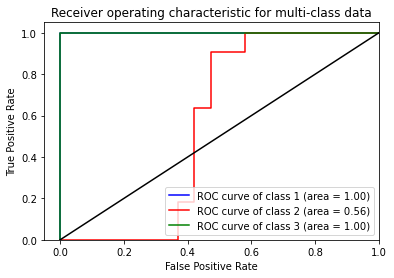

In [14]:
# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_bin_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [15]:
# test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_score)

# Resources:

* StatQuest: Logistic Regression (HIGHLY recommend for an overview of the math behind logistic regression)
    * https://www.youtube.com/watch?v=yIYKR4sgzI8
    * https://www.youtube.com/watch?v=vN5cNN2-HWE
    


### Try it out!

* https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

Keep a running notebook of different algorithms predicting on this dataset!